In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv('labeled_fulldata.csv')

df = df.sample(frac=1, random_state=42)
#df = df[0:25000]  

# Features and target
X_text = df['text']
X_numeric = df['dominant_topic']  
y = df['fake_news_flag']  

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'dominant_topic']], y, test_size=0.2, random_state=42)

# Create a column transformer
# - Use TfidfVectorizer for the text column
# - Use StandardScaler for the numeric column
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000), 'text'),  # Limit number of features
        ('num', StandardScaler(), ['dominant_topic'])  # Standard scale for numeric columns
    ])

# Create a pipeline that first applies the preprocessor, then trains Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6727358612101172
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68     11466
           1       0.69      0.65      0.67     11821

    accuracy                           0.67     23287
   macro avg       0.67      0.67      0.67     23287
weighted avg       0.67      0.67      0.67     23287



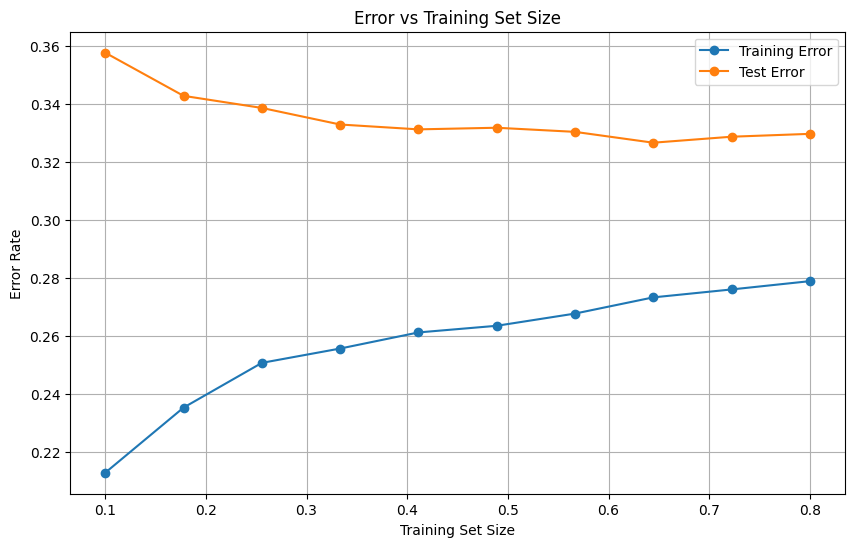

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


training_set_sizes = np.linspace(0.1, 0.8, 10) 
train_errors = []
test_errors = []

# Loop through different training set sizes
for train_size in training_set_sizes:
    # Get subset of training set
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

    preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=5000), 'text'), 
        ('num', StandardScaler(), ['dominant_topic'])  
    ])

    # Create a pipeline that first applies the preprocessor, then trains Logistic Regression
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=5000)) 
    ])

    pipeline.fit(X_train_subset, y_train_subset)
    
    train_pred = pipeline.predict(X_train_subset)
    test_pred = pipeline.predict(X_test)
    
    # Compute accuracy scores for testing and training
    train_error = 1 - accuracy_score(y_train_subset, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)
    
    # Add new scores to list
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, train_errors, label="Training Error", marker='o')
plt.plot(training_set_sizes, test_errors, label="Test Error", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Error Rate")
plt.title("Error vs Training Set Size")
plt.legend()
plt.grid(True)
plt.show()